# **About Data**



> **The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.**

**"Data Dictionary"**  

**Booking_ID:** unique identifier of each booking  

**no_of_adults:** Number of adults  

**no_of_children:** Number of Children  

**no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  

**no_of_week_nights:** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  

**type_of_meal_plan:** Type of meal plan booked by the customer  

**required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)  

**room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.  

**lead_time:** Number of days between the date of booking and the arrival date  

**arrival_year:** Year of arrival date  

**arrival_month:** Month of arrival date  

**arrival_date:** Date of the month  

**market_segment_type:** Market segment designation.  

**repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)  

**no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking  

**no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking  

**avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)  

**no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)  

**booking_status:** Flag indicating if the booking was canceled or not.  

# **Analysis**

## **Import Libraries**

In [ ]:
# Cleaning and Viualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.subplots as sp
import plotly.colors as cl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re

# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.impute import SimpleImputer


#Classification models
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import (SGDClassifier, LogisticRegression,
                                        LinearRegression,Ridge, Lasso, ElasticNet)

from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                                    GradientBoostingClassifier, AdaBoostRegressor)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Regression models
from sklearn.ensemble import (RandomForestRegressor,
                                ExtraTreesRegressor,
                                BaggingRegressor,
                                GradientBoostingRegressor,
                                HistGradientBoostingRegressor)

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

from sklearn.model_selection import cross_validate


## **Load Data**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel_Reservations.csv')

## **Data**

In [ ]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## **Some Information About Data**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.describe(include = 'object')


,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN36275,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [ ]:
def unique_counts(df):
    num_unique = df.nunique().sort_values(ascending=False)
    pct_unique = ((df.nunique().sort_values(ascending=False) / len(df)) * 100).round(3)
    pct_unique = pct_unique.astype(str) + '%'

    unique = pd.DataFrame({
        'Unique Count': num_unique,
        'Percentage Unique': pct_unique
    })

    return unique

In [ ]:
unique_counts(df)

,Unique Count,Percentage Unique
Booking_ID,36275,100.0%
avg_price_per_room,3930,10.834%
lead_time,352,0.97%
no_of_previous_bookings_not_canceled,59,0.163%
arrival_date,31,0.085%
no_of_week_nights,18,0.05%
arrival_month,12,0.033%
no_of_previous_cancellations,9,0.025%
no_of_weekend_nights,8,0.022%
room_type_reserved,7,0.019%


## **Drop Booking_ID**

In [ ]:
df.drop('Booking_ID', axis=1, inplace=True)


## **Duplicated after drop ID**

In [ ]:
print(df.duplicated().sum())


10275


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Split The Data</b></div>

In [ ]:
X = df.drop('booking_status',axis=1)
y = df[['booking_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9078,2,0,1,2,Meal Plan 1,0,Room_Type 1,273,2018,5,13,Offline,0,0,0,95.00,0,Canceled
36042,2,0,1,3,Meal Plan 1,0,Room_Type 1,158,2018,6,30,Online,0,0,0,90.95,1,Canceled
5929,2,0,2,1,Meal Plan 1,0,Room_Type 1,59,2018,11,26,Online,0,0,0,93.60,1,Not_Canceled
6928,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,10,25,Aviation,0,0,0,95.00,0,Not_Canceled
34607,2,2,2,4,Meal Plan 1,0,Room_Type 6,54,2018,4,29,Online,0,0,0,187.85,0,Canceled


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Data Exploration</b></div>

In [ ]:
train_cop = train.copy()

In [ ]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations',
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b> Univariate Analysis</b></div>

## Num Feature

In [ ]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes]
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')

            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')

        plt.tight_layout()
        plt.show()

<ipython-input-15-820fbb13a096>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
<ipython-input-15-820fbb13a096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
<ipython-input-15-820fbb13a096>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
<ipython-input-15-820fbb13a096>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
<ipython-input-15-820fbb13a096>:6: UserWarning: Ignoring `

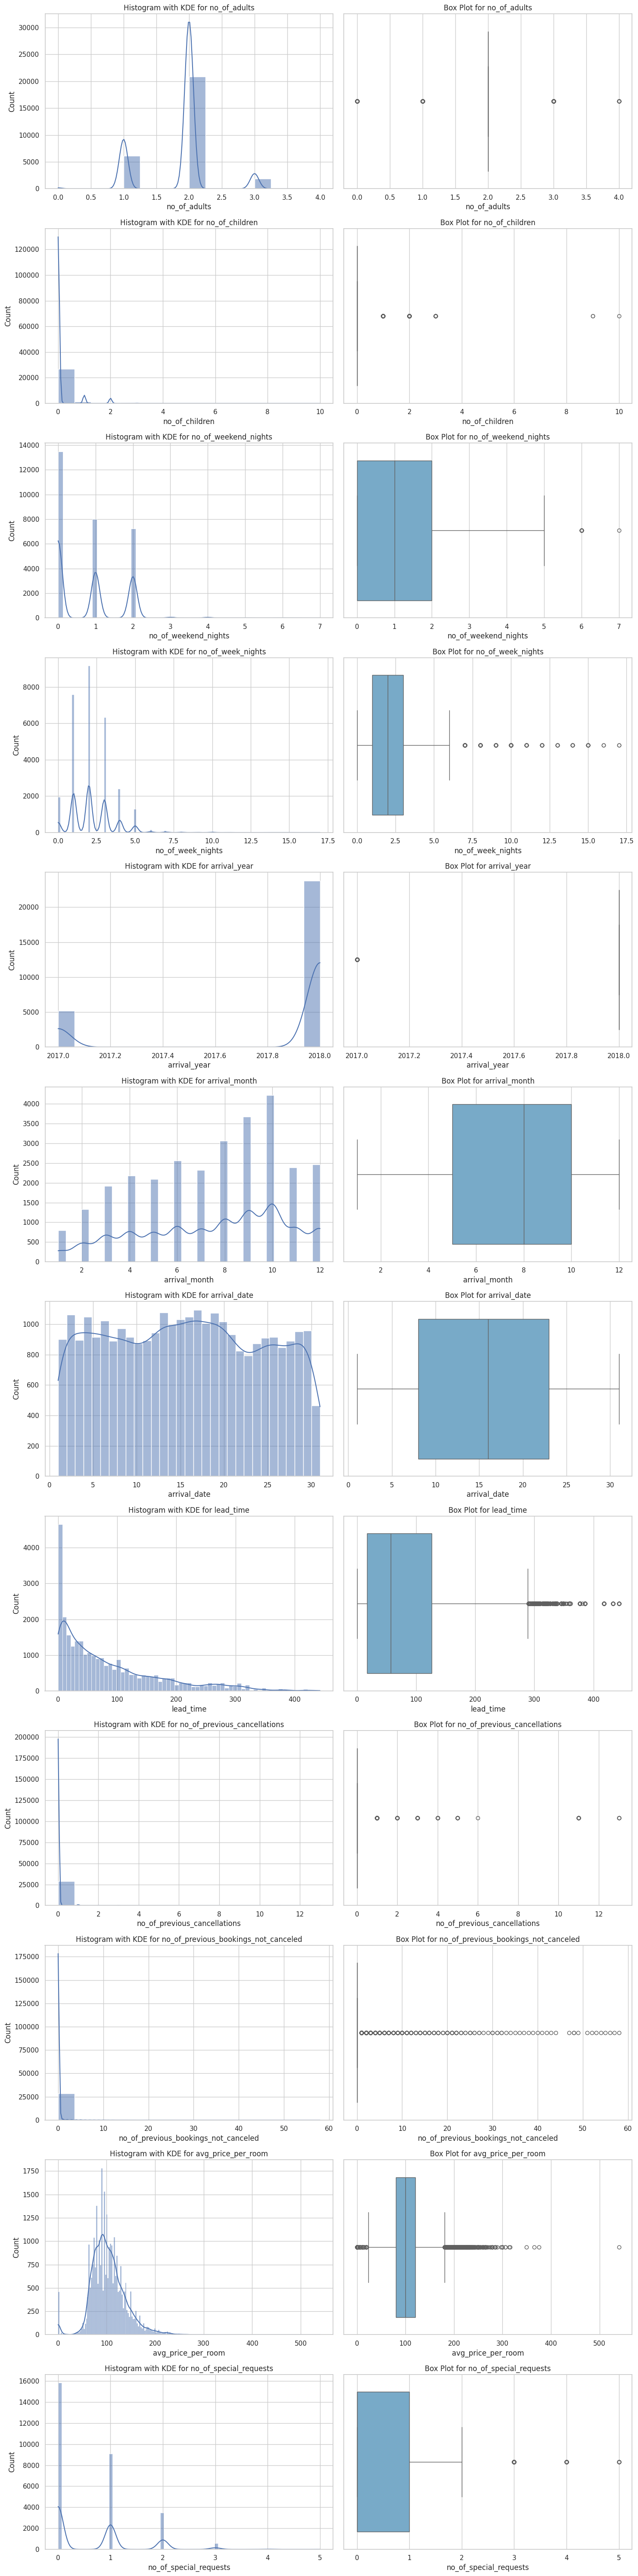

In [ ]:
num_plot_dist(train_cop, num_cols)

* **`no_of_adults`:Most users keep their bookings simple without special requests. The outliers suggest a small group of customers with unique needs, which could be further analyzed for personalization strategies.**
* **`no_of_children`:The vast majority of bookings are for adults only, with a small number of bookings including children. This suggests a strong preference for adult-only travel and highlights a niche market for family-friendly accommodations.**
* **`no_of_weekend_nights`:The majority of bookings are for short weekend stays, with a few outliers indicating longer weekend getaways. This suggests a preference for quick weekend escapes and a niche market for extended weekend trips.**
* **`no_of_special_requests`:The vast majority of bookings have no special requests, with a few outliers indicating bookings with multiple special requests. This suggests that most customers have simple booking needs, while a small segment requires additional accommodations or preferences.**
* **`arrival_month`: The data indicates a clear seasonal pattern in bookings. There's a significant increase in bookings from July to August, peaking in August. This peak period is then followed by a decline in bookings, suggesting a potential high season for the business during these months.**
* **`avg_price_per_room`:a majority of rooms being more affordable and a smaller number of high-priced rooms.icantly higher prices.**

In [ ]:
df[df['no_of_adults']==0]['no_of_children'].value_counts()

,count
no_of_children,
2,133
3,5
1,1


`the some chlidren can booking so when no_of_adults = 0 the no_of_children > 0`

In [ ]:
# First, combine the date columns into a single column of strings
df['date_str'] = df[['arrival_year', 'arrival_month', 'arrival_date']].astype(str).agg('-'.join, axis=1)

# Try converting the combined string into a datetime column, errors='coerce' will set invalid dates to NaT
df['Data'] = pd.to_datetime(df['date_str'], errors='coerce')

# Now, you can check which rows have invalid dates (NaT values)
invalid_dates = df[df['Data'].isna()]

# Optionally, remove invalid dates or handle them in another way:
# Example: Drop rows with invalid dates
df = df.dropna(subset=['Data'])



In [ ]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['arrival_month'].apply(get_season)

<ipython-input-19-d30f6a39b1ce>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['arrival_month'].apply(get_season)


In [ ]:
df.drop(['arrival_year', 'arrival_month', 'arrival_date', 'date_str'], axis=1, inplace=True)

<ipython-input-20-11131d584178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['arrival_year', 'arrival_month', 'arrival_date', 'date_str'], axis=1, inplace=True)


In [ ]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Data,season
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,Autumn
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,Autumn
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28,Winter
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20,Spring
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03,Summer
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17,Autumn
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01,Summer
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21,Spring


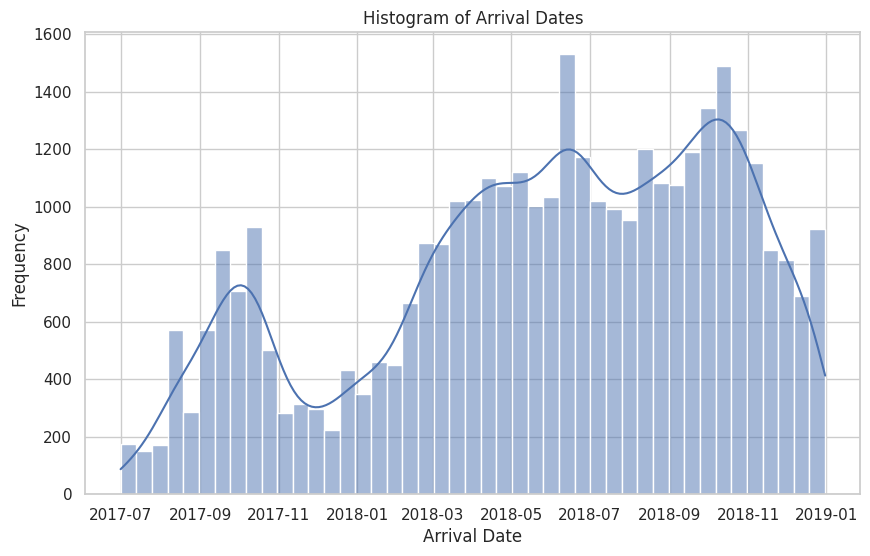

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Data'], kde=True)
plt.title('Histogram of Arrival Dates')
plt.xlabel('Arrival Date')
plt.ylabel('Frequency')
plt.show()


## Cat Feature

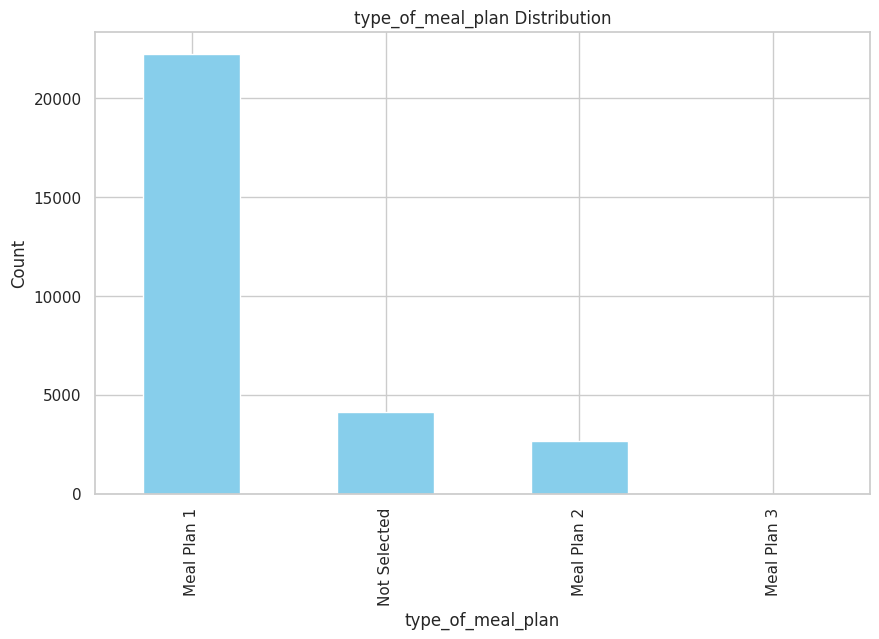

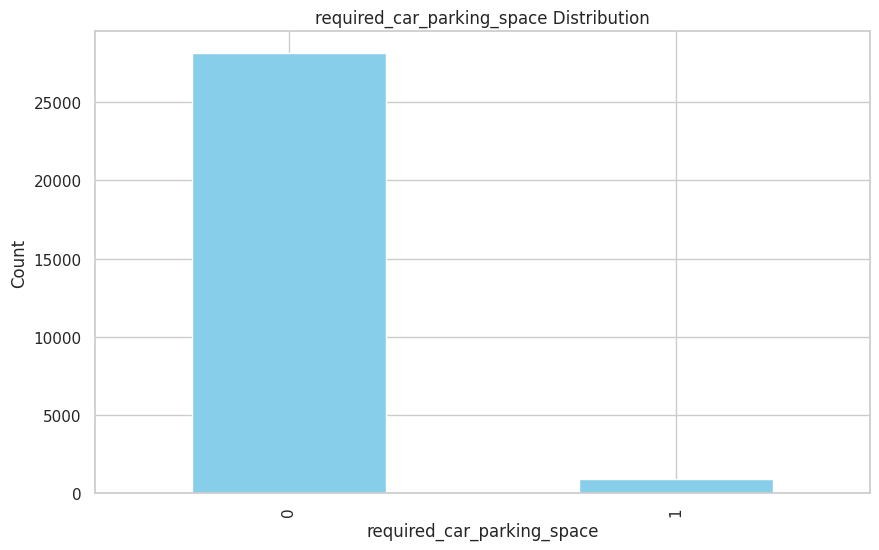

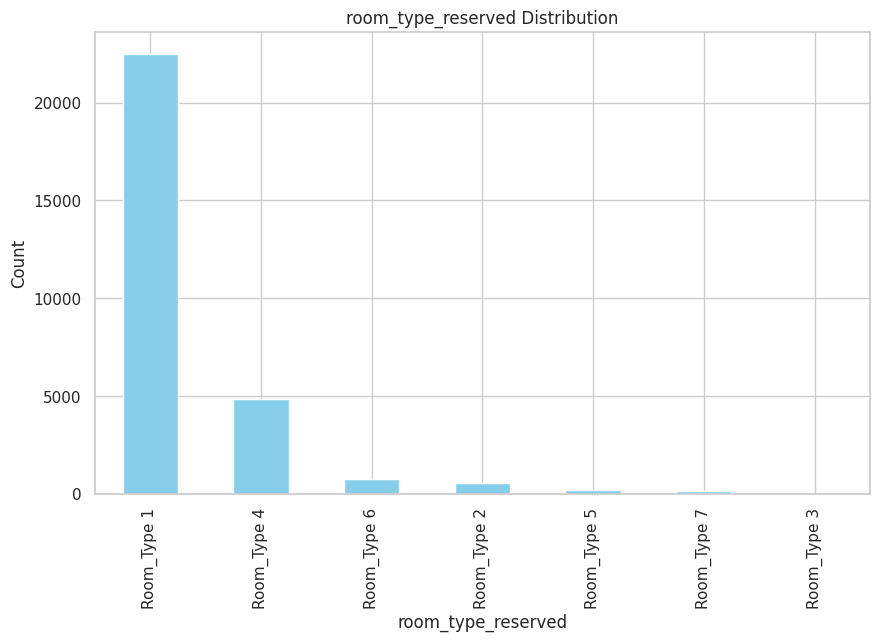

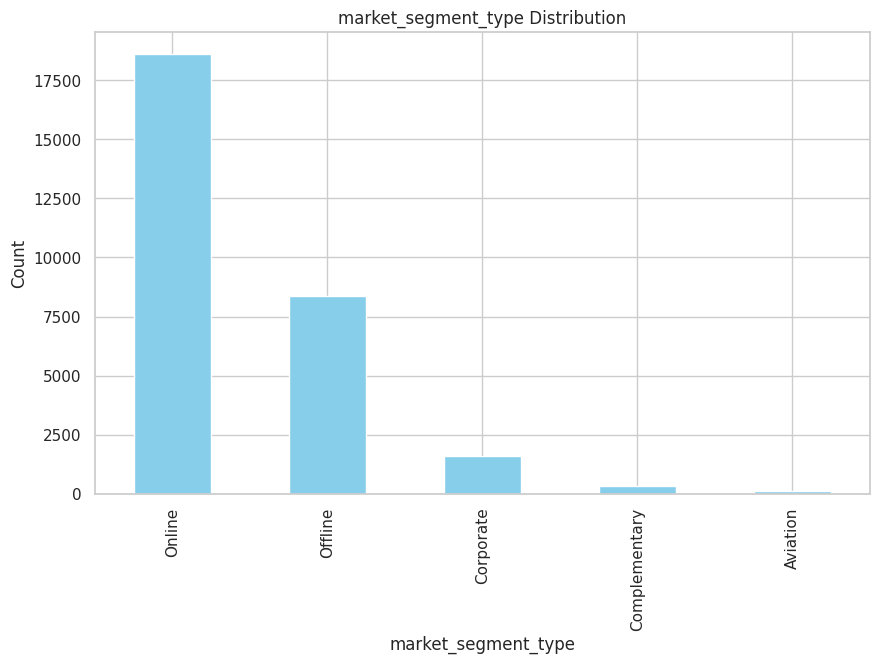

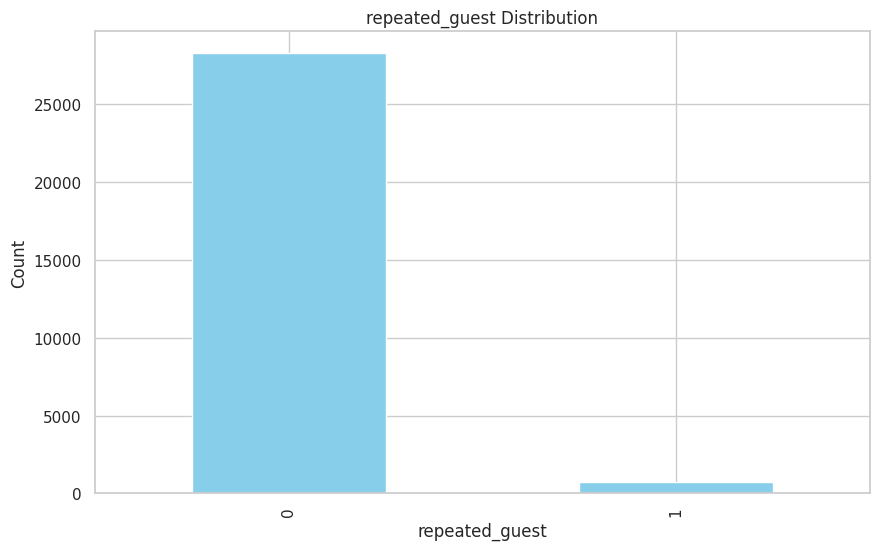

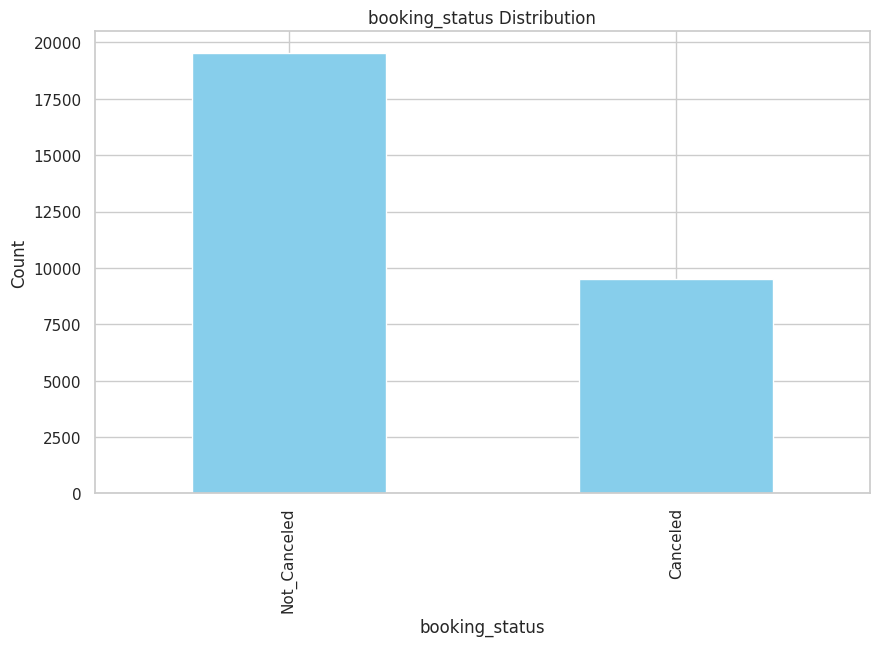

In [ ]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        train_cop[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()


* **there's imbalanced data so we must carry about it**

<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Bivariate Analysis</b></div>

## Num Feature

In [ ]:
def plot_box_target(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f'{column} vs {target}')

    plt.tight_layout()
    plt.show()


<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

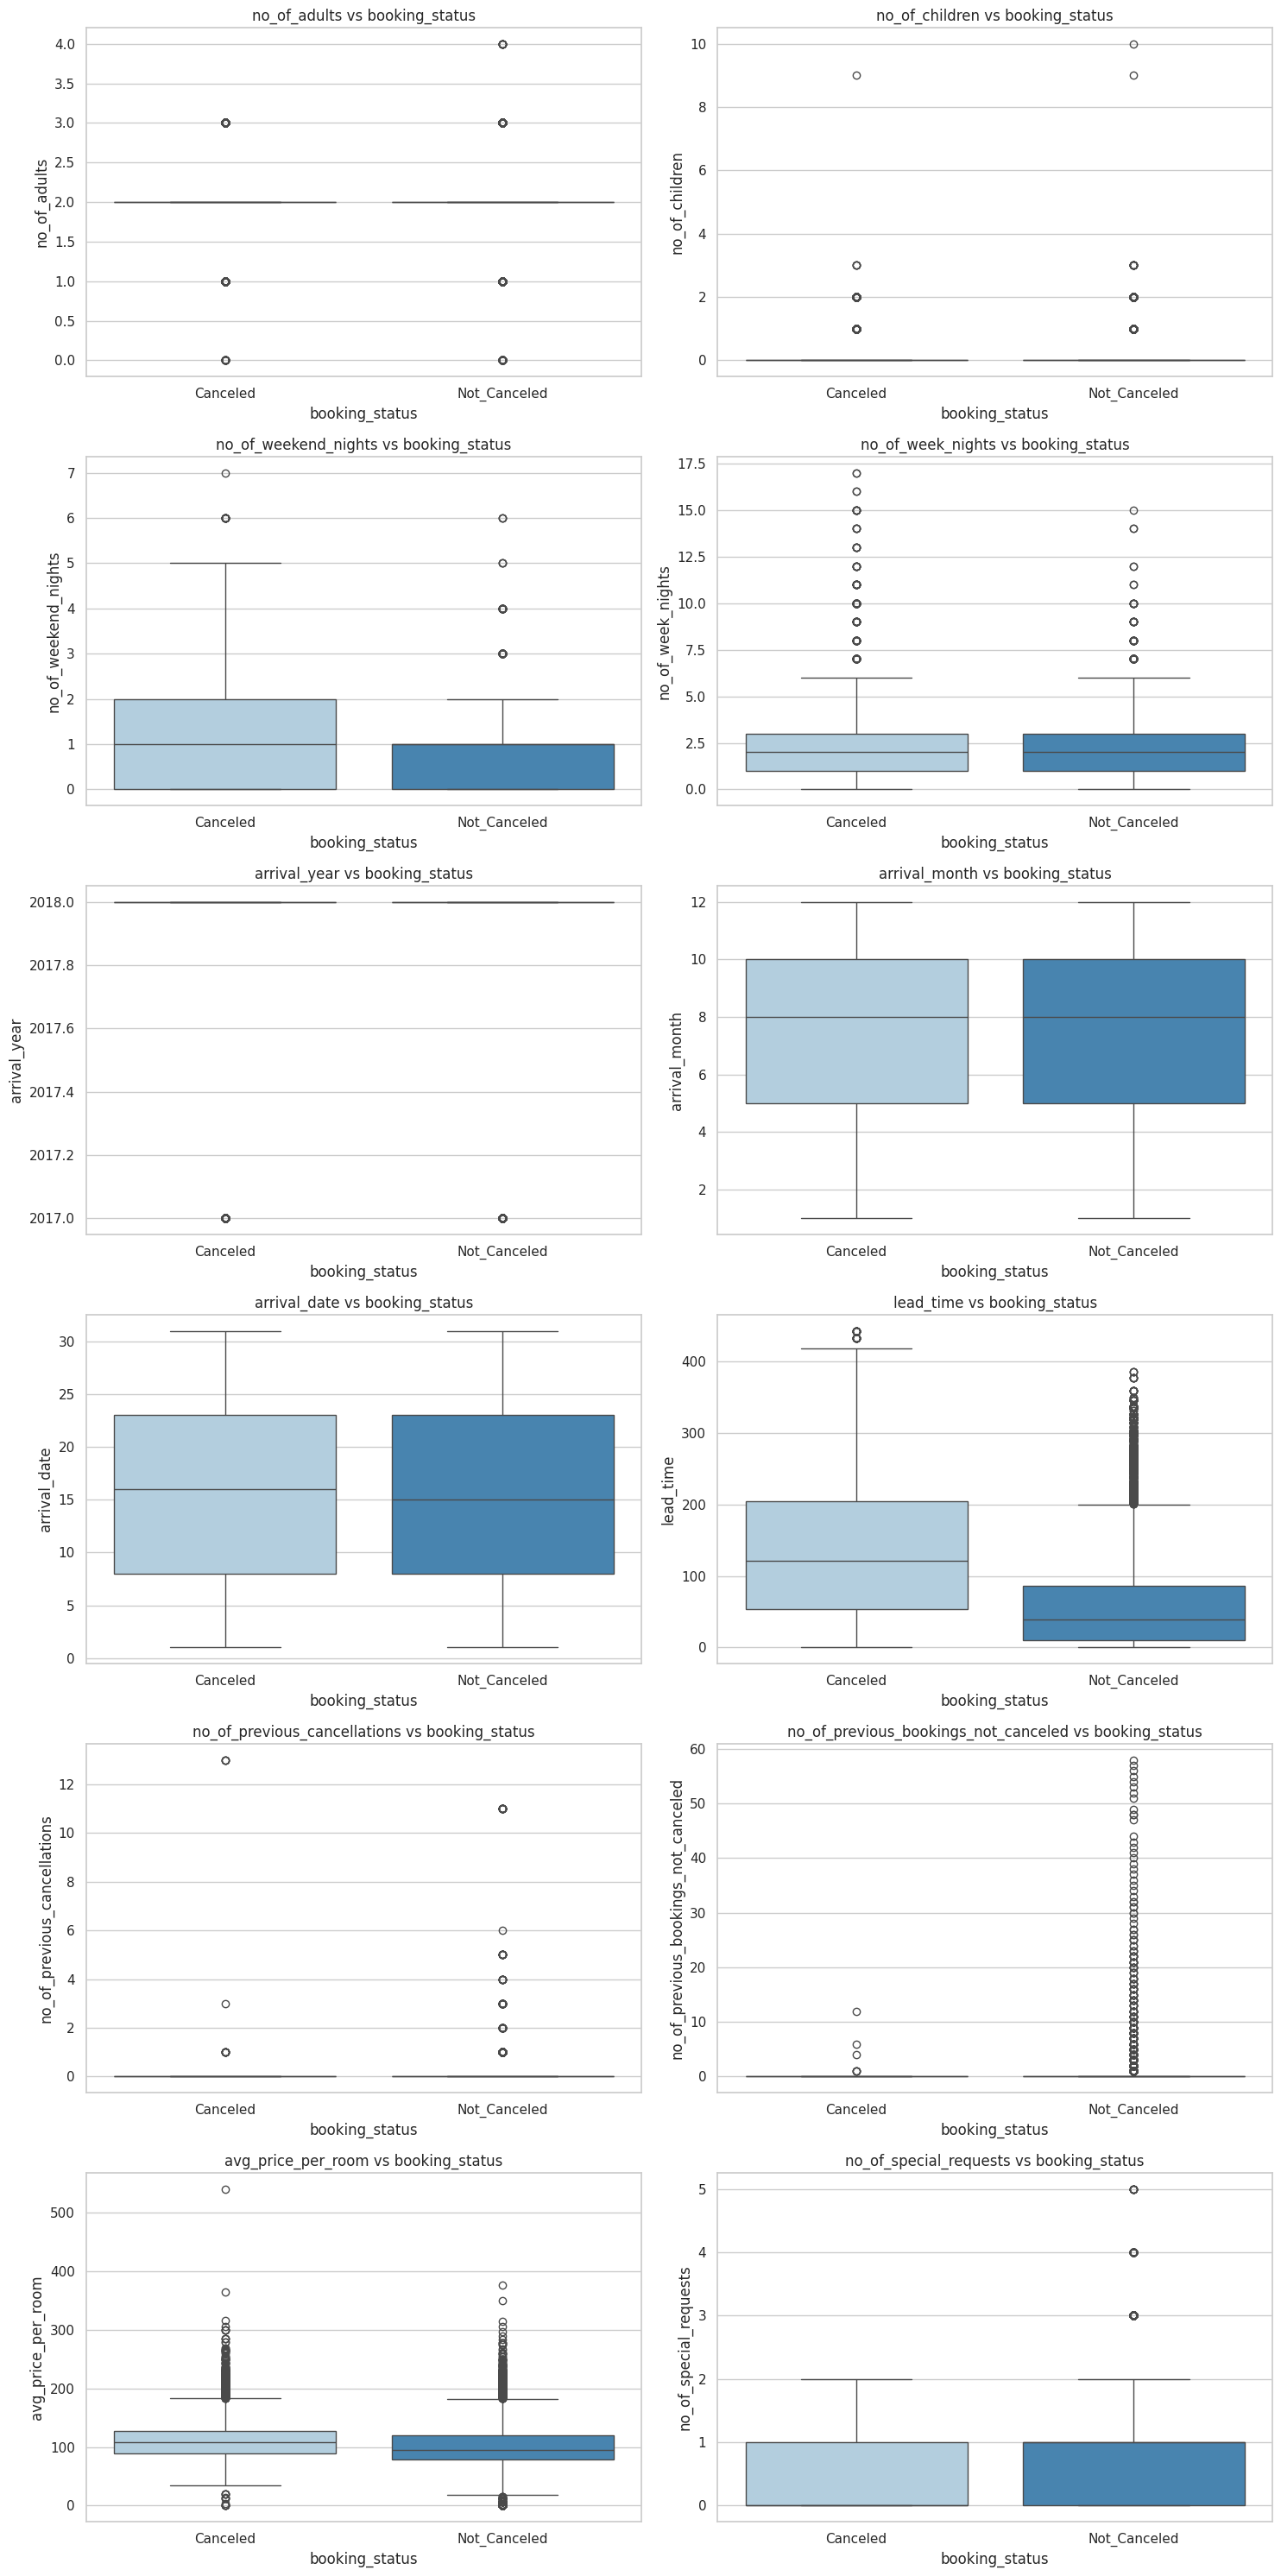

In [ ]:
plot_box_target(train_cop, 'booking_status', num_cols)


- **Number of Adults and Children**: These features show similar distributions for canceled and not-canceled bookings, indicating they are not strong predictors of cancellation.

- **Number of Weekend and Week Nights**: Both show similar distributions for canceled and not-canceled bookings, suggesting they do not significantly predict cancellations.

- **Lead Time**: Canceled bookings tend to have longer lead times, implying that longer booking horizons may correlate with a higher risk of cancellation.

- **Previous Cancellations**: Customers with a history of cancellations are more likely to cancel again, making past cancellations a strong predictor of future cancellations.

- **Previous Non-Canceled Bookings**: Customers with more non-canceled bookings are less likely to cancel, indicating past non-cancellations are a good predictor of future behavior.

- **Number of Special Requests**: The number of special requests has little impact on cancellation rates, suggesting it is not a key predictor of cancellations.

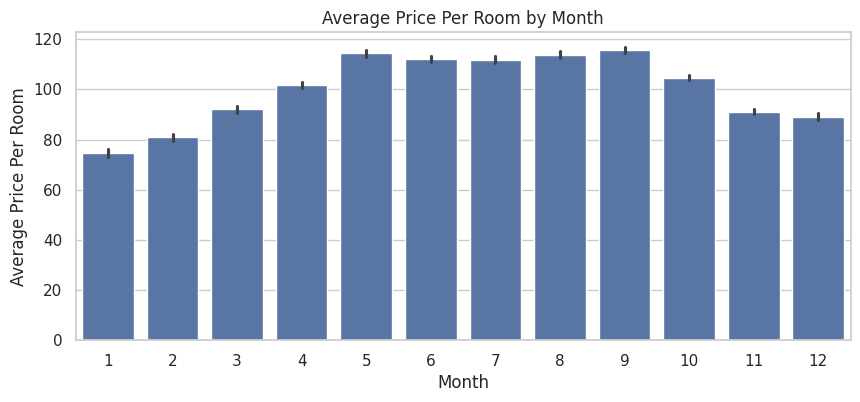

In [ ]:
plt.figure(figsize=(10, 4))

sns.barplot(x='arrival_month', y='avg_price_per_room',data=train_cop)

plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Month')
plt.show()

* **The price tends to higher during holiday seasons(5-9)months the price increase from 1-6 and dcrease again from 9-12**
* **will divid the months to seasons**

In [ ]:
# def get_season(month):
#     if month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     elif month in [9, 10, 11]:
#         return 'Autumn'
#     else:
#         return 'Winter'

# df['season'] = df['arrival_month'].apply(get_season)


In [ ]:
# تحليل موسمي للإلغاءات والحجوزات
seasonal_analysis = df.groupby('season')['booking_status'].value_counts(normalize=True).unstack() * 100
seasonal_analysis = seasonal_analysis.rename(columns={'Canceled': 'Cancellation Rate', 'Not_Canceled': 'Booking Rate'})

# عرض النتائج
print("نسبة الإلغاء والحجوزات حسب الموسم:")
display(seasonal_analysis.style.format("{:.2f}%").background_gradient(cmap='Blues'))

# تحليل موسمي للمتغيرات المهمة
seasonal_stats = df.groupby('season').agg({
    'lead_time': 'mean',
    'avg_price_per_room': 'mean',
    'no_of_special_requests': 'mean',
    'booking_status': lambda x: (x == 'Canceled').mean() * 100
}).rename(columns={'booking_status': 'Cancellation Rate (%)'})

print("\nإحصائيات موسمية:")
display(seasonal_stats.style.format({
    'lead_time': '{:.1f} days',
    'avg_price_per_room': '${:.2f}',
    'no_of_special_requests': '{:.2f}',
    'Cancellation Rate (%)': '{:.2f}%'
}).background_gradient(cmap='YlOrRd'))

نسبة الإلغاء والحجوزات حسب الموسم:


booking_status,Cancellation Rate,Booking Rate
season,,
Autumn,33.26%,66.74%
Spring,34.36%,65.64%
Summer,41.19%,58.81%
Winter,14.89%,85.11%



إحصائيات موسمية:


,lead_time,avg_price_per_room,no_of_special_requests,Cancellation Rate (%)
season,,,,
Autumn,94.0 days,$105.51,0.68,33.26%
Spring,69.4 days,$102.89,0.52,34.36%
Summer,103.4 days,$112.35,0.63,41.19%
Winter,55.3 days,$83.96,0.59,14.89%


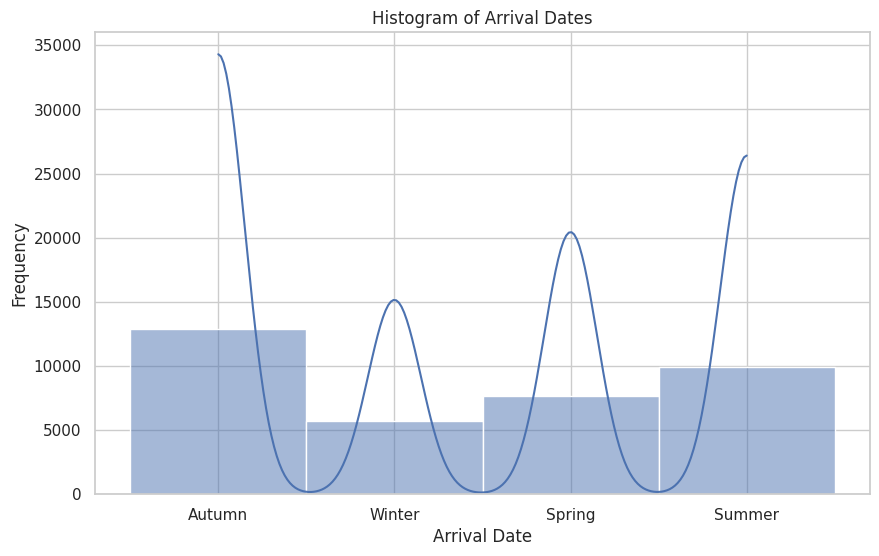

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['season'], kde=True)
plt.title('Histogram of Arrival Dates')
plt.xlabel('Arrival Date')
plt.ylabel('Frequency')
plt.show()


<ipython-input-30-e095e04e6aa5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='Cancellation Rate',
<ipython-input-30-e095e04e6aa5>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='lead_time',
<ipython-input-30-e095e04e6aa5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='avg_price_per_room',


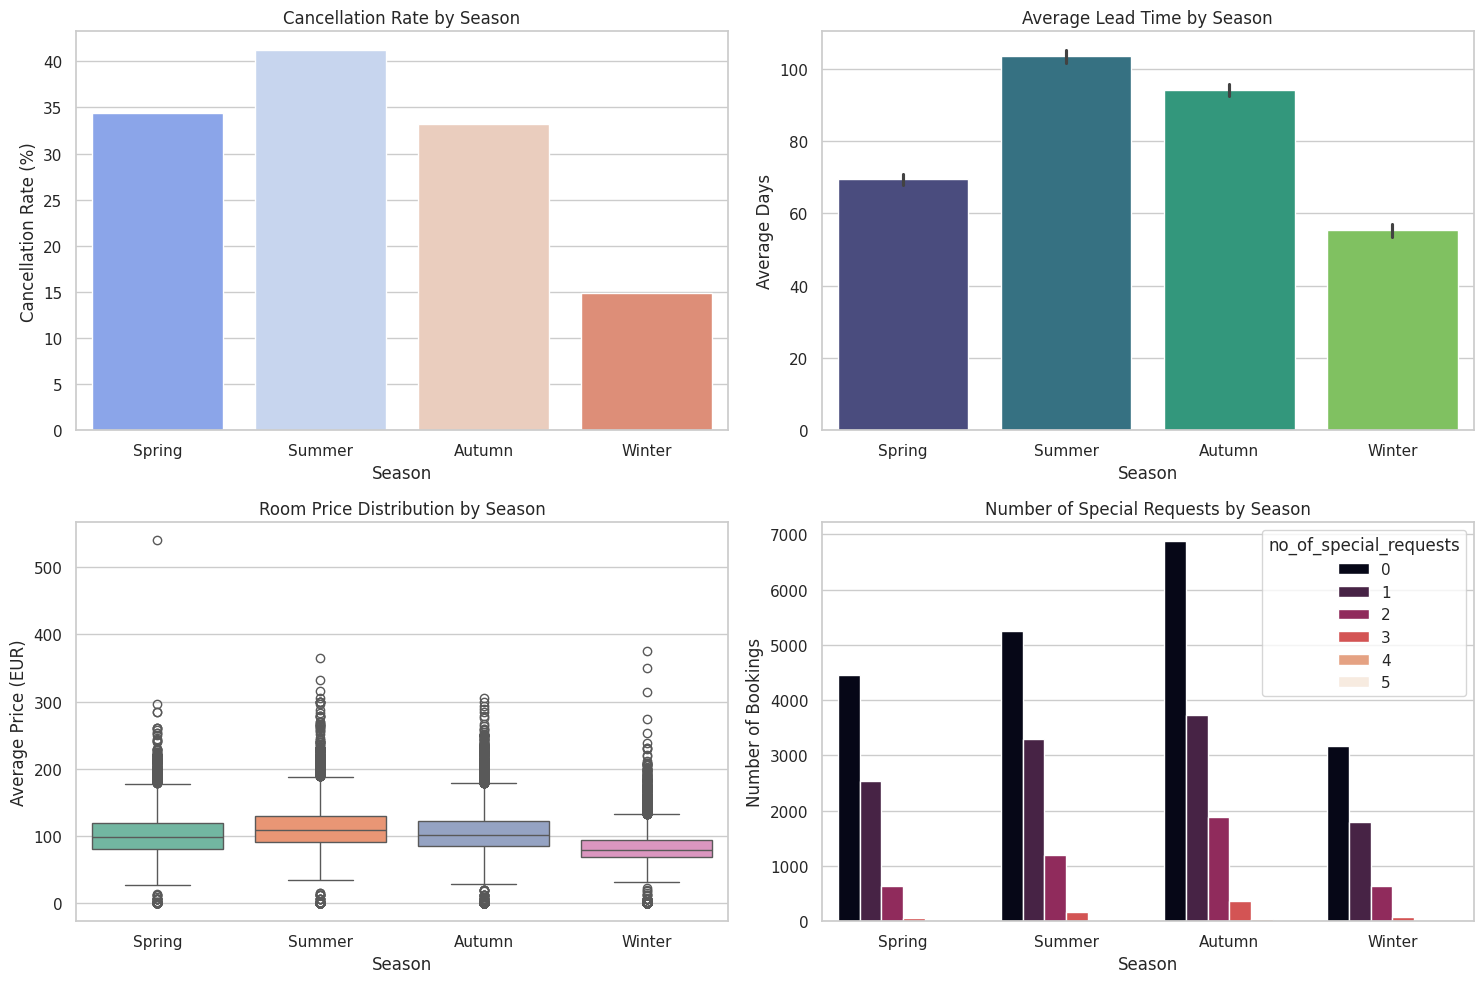

In [ ]:
plt.figure(figsize=(15, 10))

# Plot 1: Cancellation Rate by Season
plt.subplot(2, 2, 1)
sns.barplot(x='season', y='Cancellation Rate',
            data=seasonal_analysis.reset_index(),
            order=['Spring', 'Summer', 'Autumn', 'Winter'],
            palette='coolwarm')
plt.title('Cancellation Rate by Season')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Season')

# Plot 2: Average Lead Time by Season
plt.subplot(2, 2, 2)
sns.barplot(x='season', y='lead_time',
            data=df,
            order=['Spring', 'Summer', 'Autumn', 'Winter'],
            palette='viridis')
plt.title('Average Lead Time by Season')
plt.ylabel('Average Days')
plt.xlabel('Season')

# Plot 3: Room Price Distribution by Season
plt.subplot(2, 2, 3)
sns.boxplot(x='season', y='avg_price_per_room',
            data=df,
            order=['Spring', 'Summer', 'Autumn', 'Winter'],
            palette='Set2')
plt.title('Room Price Distribution by Season')
plt.ylabel('Average Price (EUR)')
plt.xlabel('Season')

# Plot 4: Special Requests by Season
plt.subplot(2, 2, 4)
sns.countplot(x='season', hue='no_of_special_requests',
             data=df,
             order=['Spring', 'Summer', 'Autumn', 'Winter'],
             palette='rocket')
plt.title('Number of Special Requests by Season')
plt.ylabel('Number of Bookings')
plt.xlabel('Season')

plt.tight_layout()
plt.show()

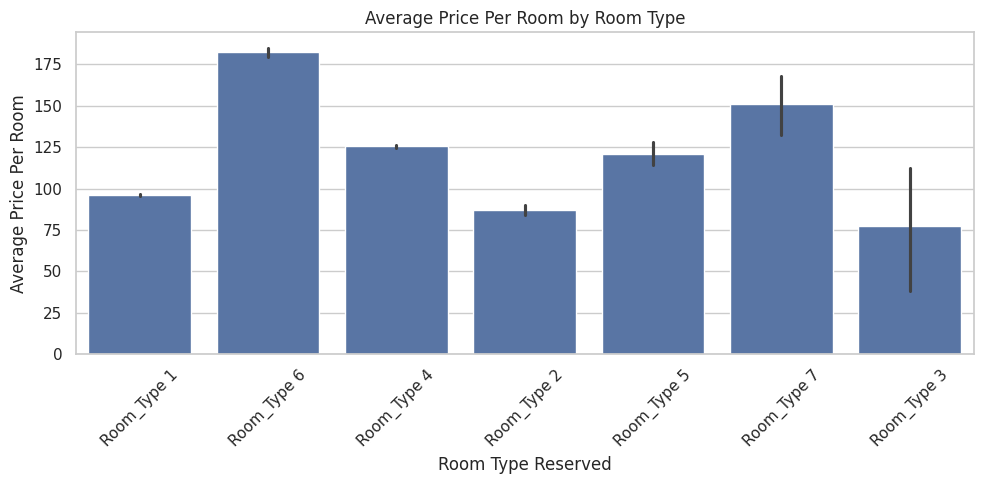

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=train_cop)

plt.xlabel('Room Type Reserved')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
conditions = [
    (train_cop['arrival_month'] <= 3),
    (train_cop['arrival_month'] > 3) & (train_cop['arrival_month'] <= 6),
    (train_cop['arrival_month'] > 6) & (train_cop['arrival_month'] <= 9),
    (train_cop['arrival_month'] >= 10)
    ]
values = [2, 3, 4, 1]
train_cop['quarter'] = np.select(conditions, values)
cat_cols.append('quarter')

## Cat Feature

In [ ]:
def plot_cat_features_with_target(df, target, cat_features):
    num_features = len(cat_features)

    num_row = (num_features + 1) // 2

    fig, axes = plt.subplots(num_row, 2, figsize=(12, num_row * 5))


    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()



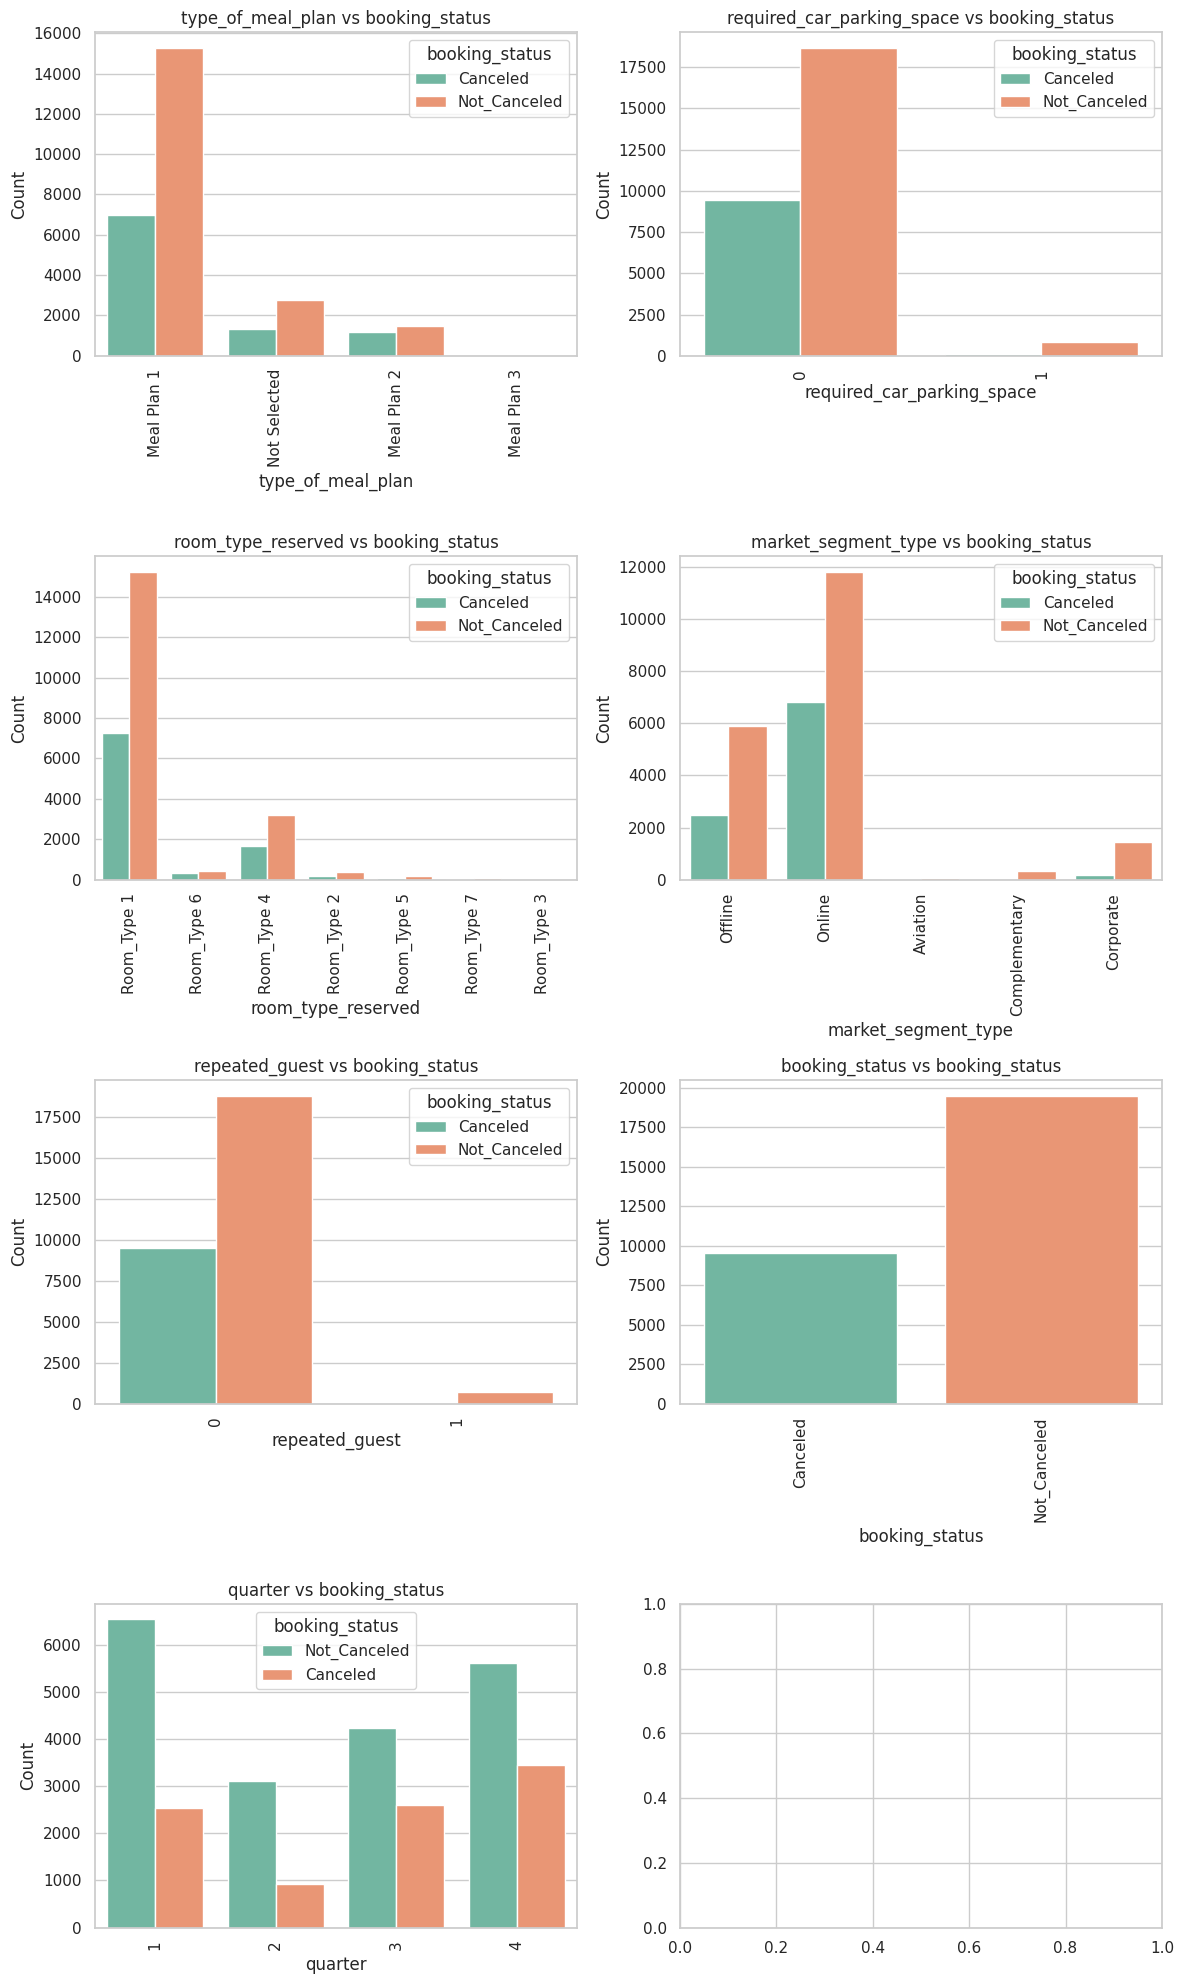

In [ ]:
plot_cat_features_with_target(train_cop, 'booking_status', cat_cols)

### Booking Cancellation Insights

- **Meal Plan**: Customers who choose "Not Selected" for their meal plan have a lower cancellation rate compared to those selecting a specific meal plan.
  
- **Car Parking**: Guests who require car parking spaces tend to not cancel their bookings as frequently as those who do not require parking spaces.

- **Room Type**: "Room Type 1" has the highest cancellation rate.

- **Market Segment**: "Complementary" bookings have a very low cancellation rate, while "Online" bookings tend to have a higher cancellation rate compared to offline bookings, possibly due to ease of cancellation, price comparisons, or flexible policies.

- **Repeated Guests**: Repeated gunoe a higher cancellation rate compared to first-time guests.

- **Data Imbalance**: There is a clear imbalance in the data, with more not-canceled bookings than canceled ones, which may affect the analysis of cancellation predictors.
predictors.


<a id="1"></a>
# <div style="text-align:center; border-radius:25px 70px; padding:9px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#FF7F50; overflow:hidden"><b>Data Preprocessing</b></div>

* ### Dropping any column which has 80% of values with the same value

In [ ]:
def get_frequency_dataframes(df, cat_cols):


        freq_dfs = [
            df.groupby([cat_column]).size().reset_index(name="count")
            for cat_column in cat_cols
        ]

        return freq_dfs, num_cols, cat_cols

In [ ]:
freq_dfs, _, _= get_frequency_dataframes(train_cop, cat_cols)

In [ ]:
def drop_high_frequency_columns(freq_dfs, df, threshold=0.8):

        for count_df in freq_dfs:
            highest_freq_percentage = (count_df["count"] / df.shape[0]).max()
            if highest_freq_percentage >= threshold:
                col_to_drop = count_df.columns[0]
                print(f'We will drop the column "{col_to_drop}" due to high frequency.')
                df = df.drop(columns=[col_to_drop])
        return df

In [ ]:
_ = drop_high_frequency_columns(freq_dfs, train_cop)

We will drop the column "required_car_parking_space" due to high frequency.
We will drop the column "repeated_guest" due to high frequency.


- **We can drop (required_car_parking_space, repeated_guest) but it will important feature because the pepole whoe required parking and repeated_guest not cancellation booking**

## Removing the multi-collinearity from the data

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def drop_high_vif_features(X_train, vif_threshold=20):

    feats_high_vif_to_be_dropped = []  # List to store the names of features dropped
    cleaned_df_from_multi_coll = X_train.copy()  # Start with a copy of the original dataframe
    num_cols_removed = 0  # Initialize a counter for the number of columns removed

    # Loop through the features of the dataframe
    for origin_df_feat_index in range(len(X_train.columns)):
        num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
        cleaned_df_feat_index = origin_df_feat_index - num_cols_removed

        # Calculate the VIF for the current feature
        VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)

        # If VIF exceeds the threshold, drop the feature
        if VIF_FEAT > vif_threshold:
            feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
            cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns=[cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

    return cleaned_df_from_multi_coll, feats_high_vif_to_be_dropped

In [ ]:
_, feats_high_vif_to_be_dropped = drop_high_vif_features(train_cop[num_cols])

In [ ]:
feats_high_vif_to_be_dropped

['arrival_year']

`will drop arrival_year because multi-colinearity`

## Correlation

In [ ]:
train_cop['booking_status'] = train_cop['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})

<ipython-input-42-ab0c73ad93e5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_cop['booking_status'] = train_cop['booking_status'].replace({'Canceled': 1, 'Not_Canceled': 0})


In [ ]:
def plot_correlation_heatmap(df, num_features):

    corr = df[num_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

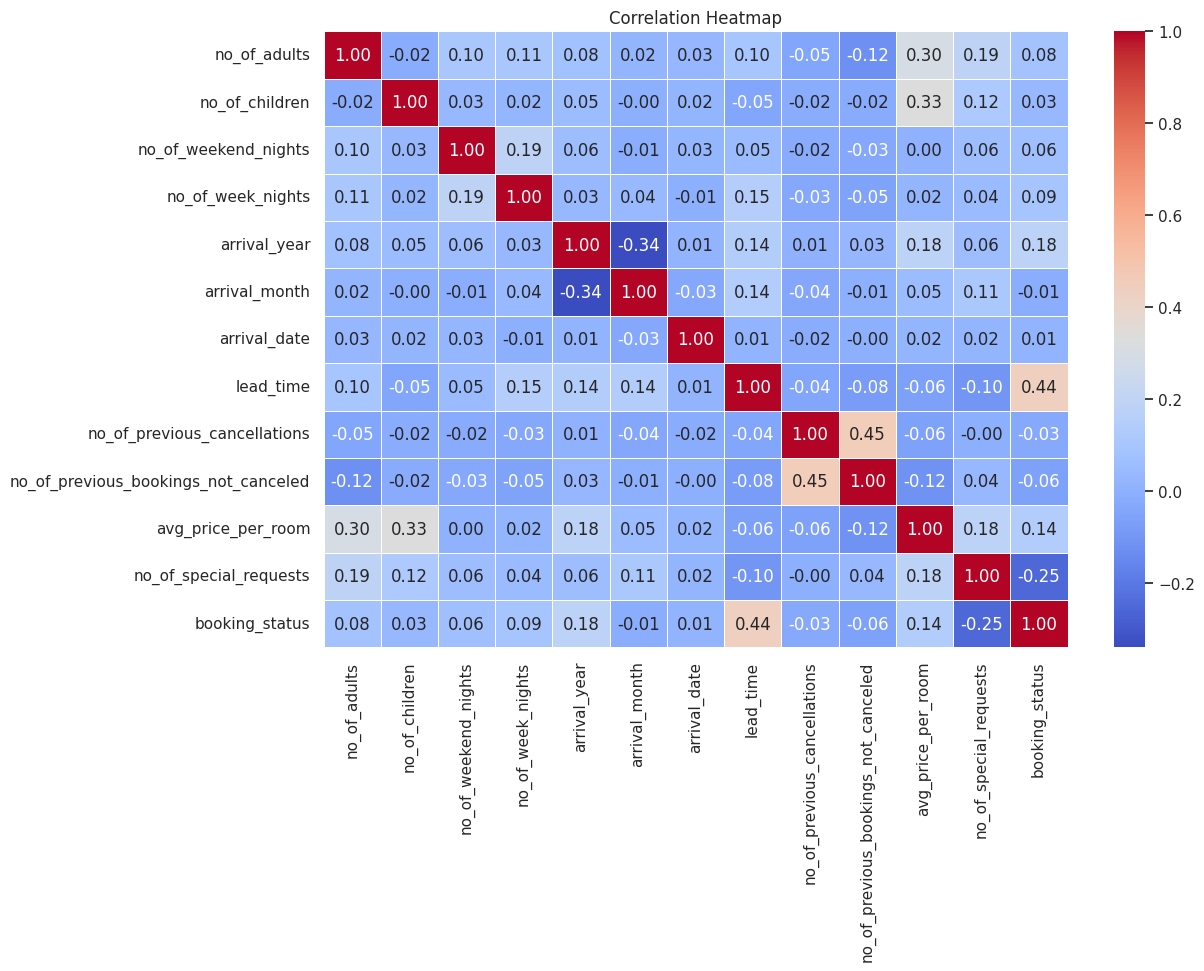

In [ ]:
plot_correlation_heatmap(train_cop, num_cols + ['booking_status'])

# بندرس الناس الي جت اكتر من مرة

In [ ]:
df_repeated_guests = df[df['repeated_guest'] == 1]
df_repeated_guests


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Data,season
88,2,0,0,1,Not Selected,0,Room_Type 1,17,Online,1,0,5,95.0,0,Not_Canceled,2018-12-10,Winter
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,Complementary,1,3,5,0.0,1,Not_Canceled,2018-06-01,Summer
155,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,Corporate,1,1,5,65.0,1,Not_Canceled,2018-11-01,Autumn
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,Complementary,1,0,1,0.0,1,Not_Canceled,2017-08-12,Summer
288,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,Complementary,1,0,3,0.0,1,Not_Canceled,2018-09-07,Autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,1,0,1,1,Meal Plan 1,1,Room_Type 1,3,Corporate,1,0,8,67.0,1,Not_Canceled,2018-06-20,Summer
36029,1,0,0,3,Meal Plan 1,1,Room_Type 1,5,Corporate,1,0,3,67.0,1,Not_Canceled,2018-09-27,Autumn
36079,1,0,0,1,Not Selected,1,Room_Type 1,0,Online,1,11,0,77.5,0,Not_Canceled,2018-01-07,Winter
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,3,15,0.0,1,Not_Canceled,2018-03-21,Spring


In [ ]:
df_repeated_guests.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Data
count,926.000000,926.000000,926.000000,926.000000,926.000000,926.000000,926.0,926.000000,926.000000,926.000000,926.000000,926
mean,1.230022,0.015119,0.448164,1.330454,0.149028,13.132829,1.0,0.913607,5.985961,65.591598,0.562635,2018-05-08 16:15:01.943844608
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,2017-08-12 00:00:00
25%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.0,0.000000,1.000000,65.000000,0.000000,2018-01-12 00:00:00
50%,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.0,0.000000,3.000000,66.000000,0.000000,2018-05-02 12:00:00
75%,1.000000,0.000000,1.000000,2.000000,0.000000,11.000000,1.0,1.000000,6.000000,80.000000,1.000000,2018-09-28 00:00:00
max,4.000000,2.000000,4.000000,8.000000,1.000000,361.000000,1.0,13.000000,58.000000,220.000000,4.000000,2018-12-30 00:00:00
std,0.436206,0.130646,0.681026,1.028713,0.356309,36.531995,0.0,2.122489,9.245646,32.060253,0.787653,NaN


In [ ]:
def get_column_types(df):
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()
    return num_cols, cat_cols

In [ ]:
num_cols, cat_cols = get_column_types(df)


<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
<ipython-input-24-4df33d34fd29>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

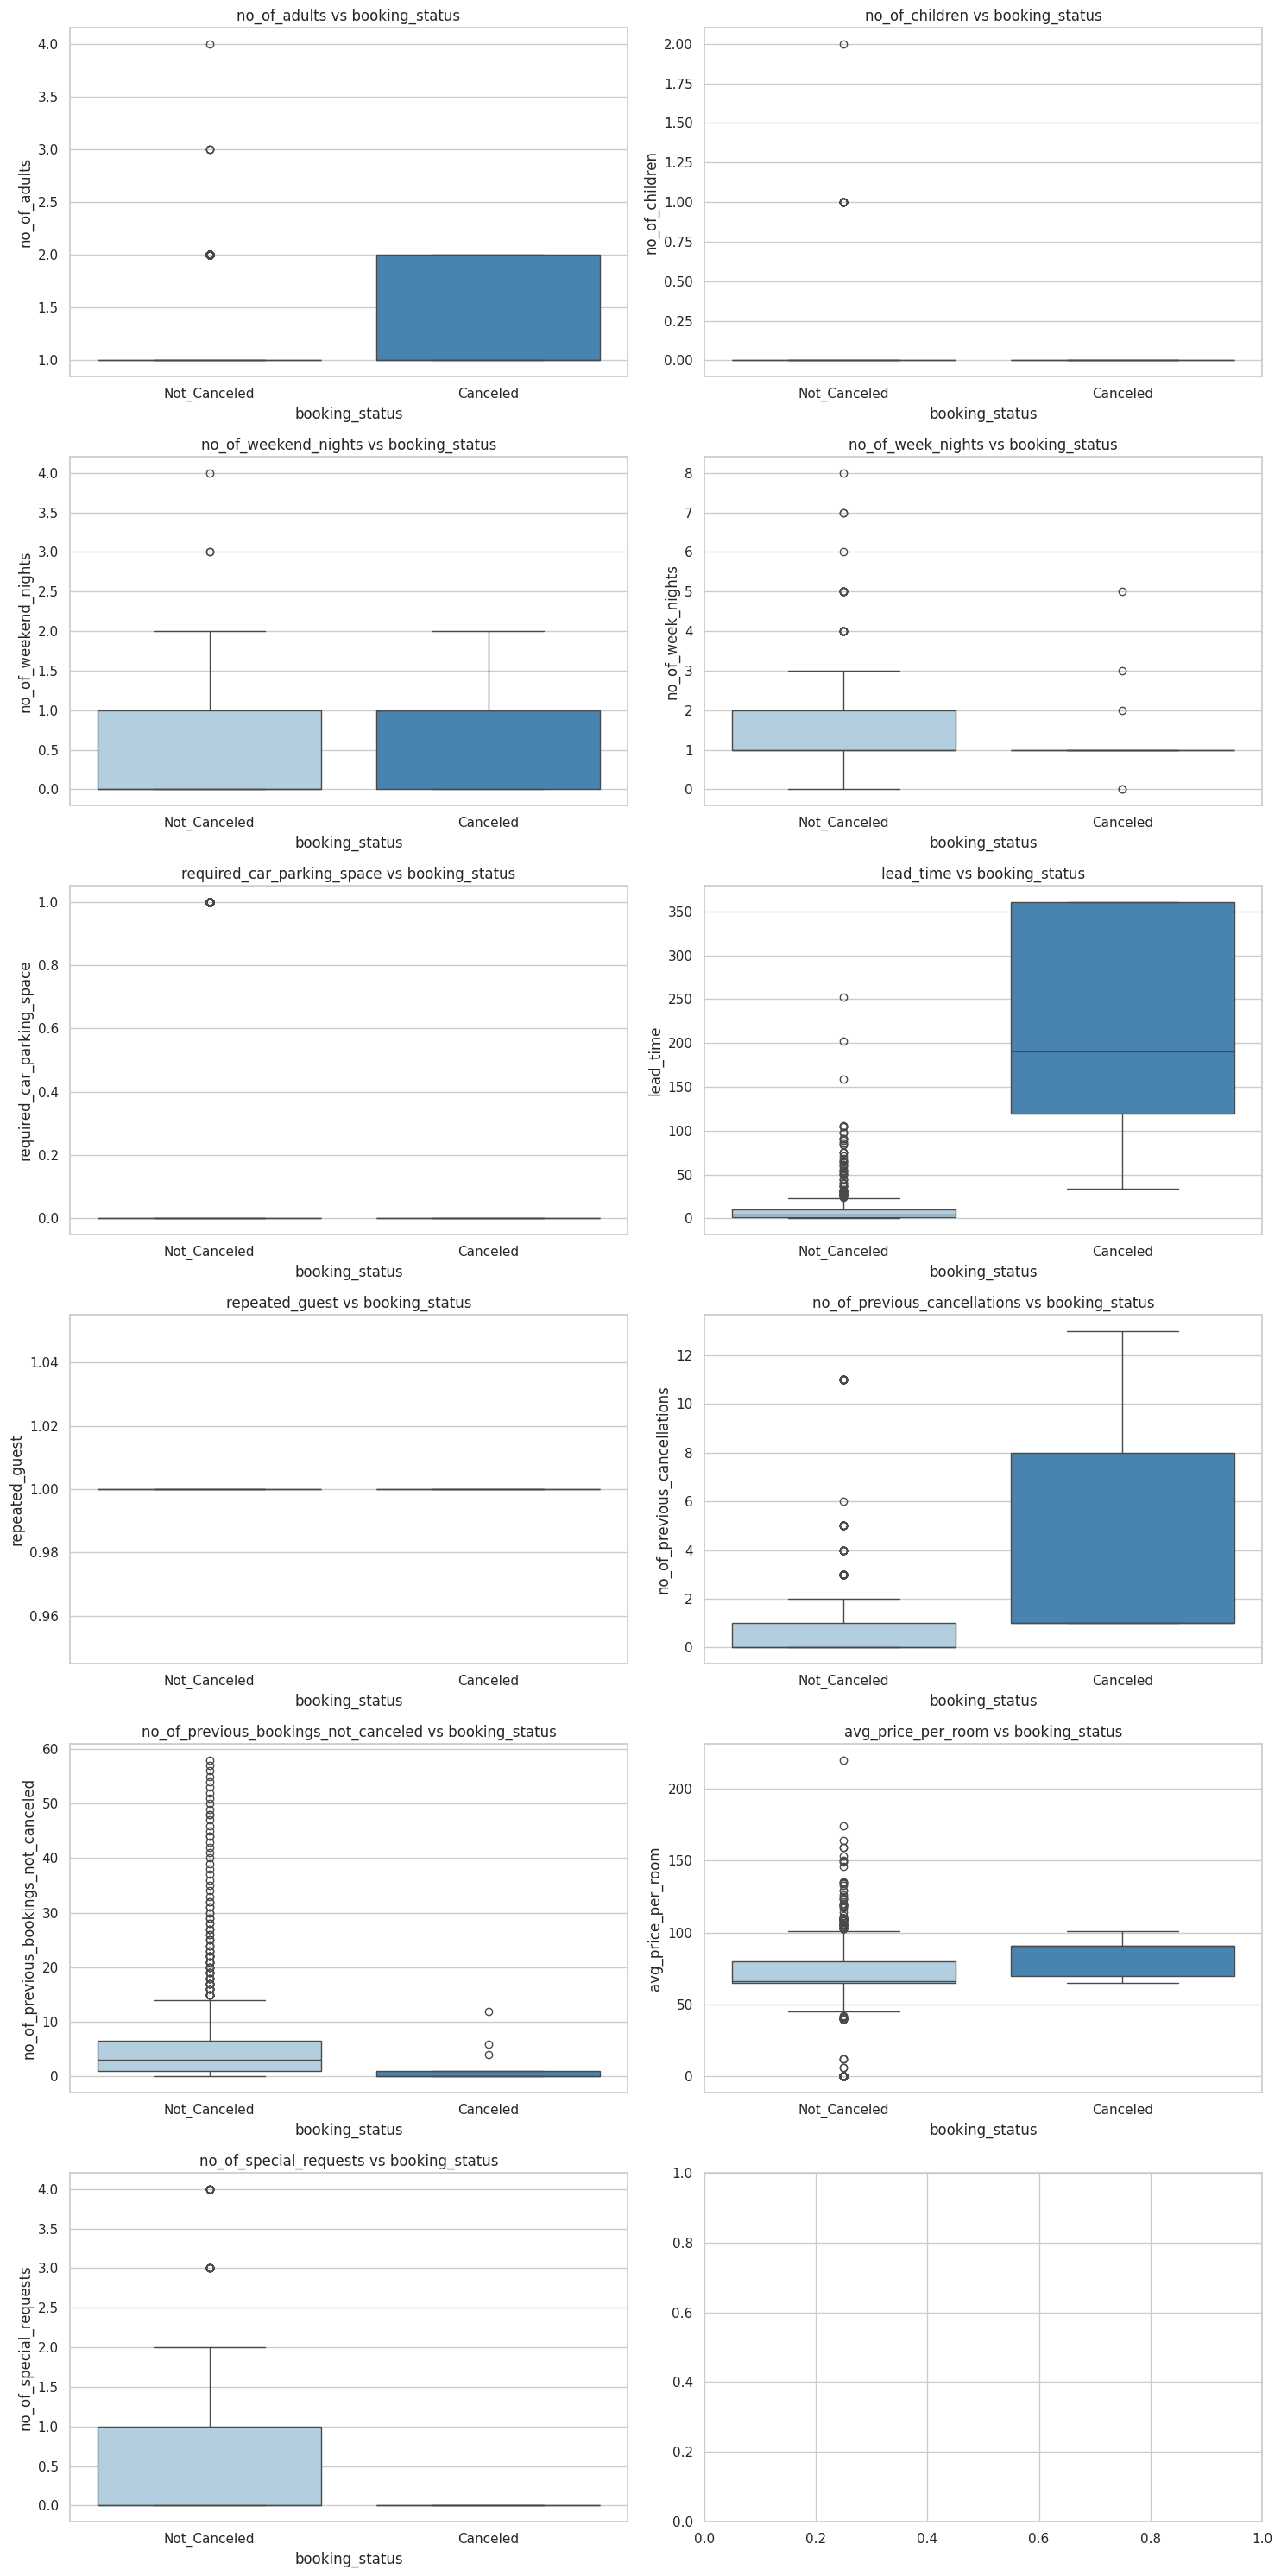

In [ ]:
plot_box_target(df_repeated_guests, 'booking_status', num_cols)

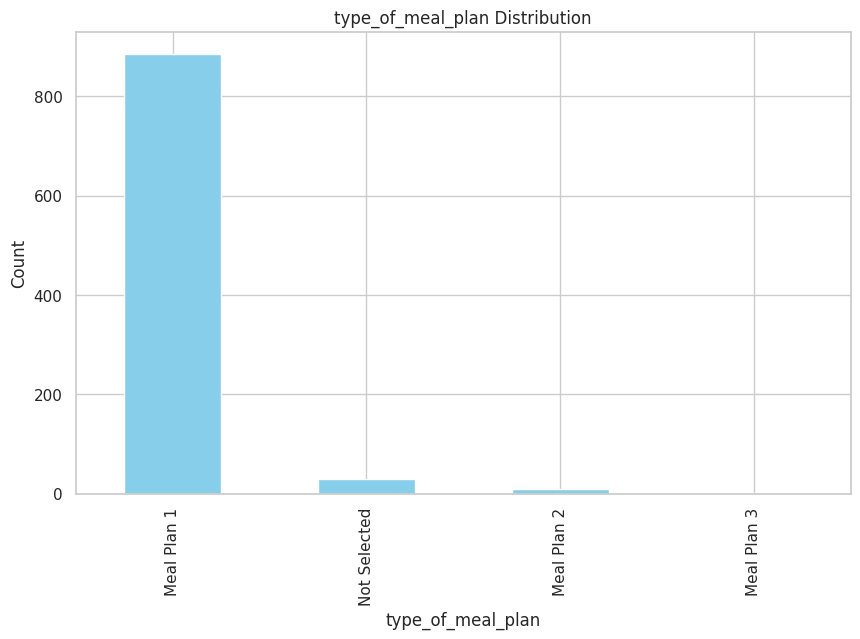

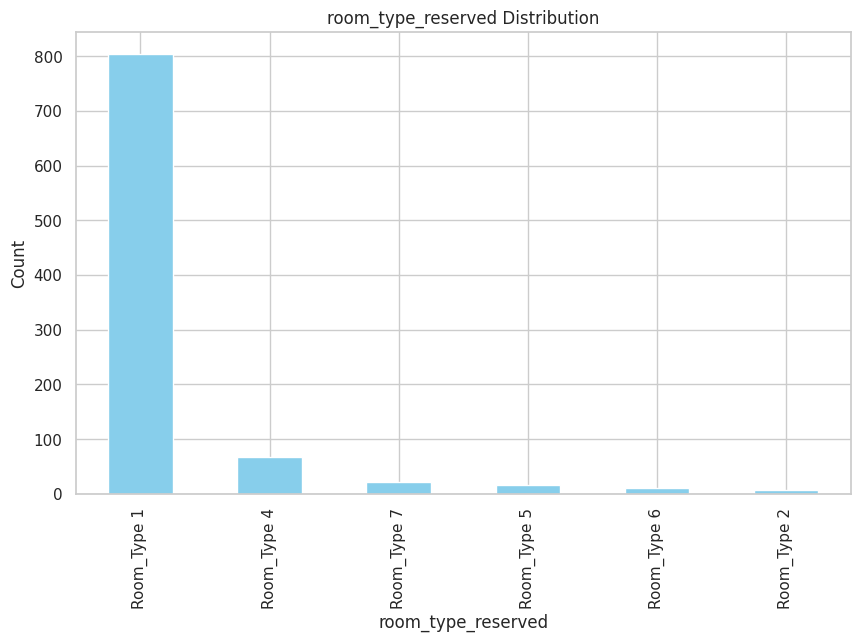

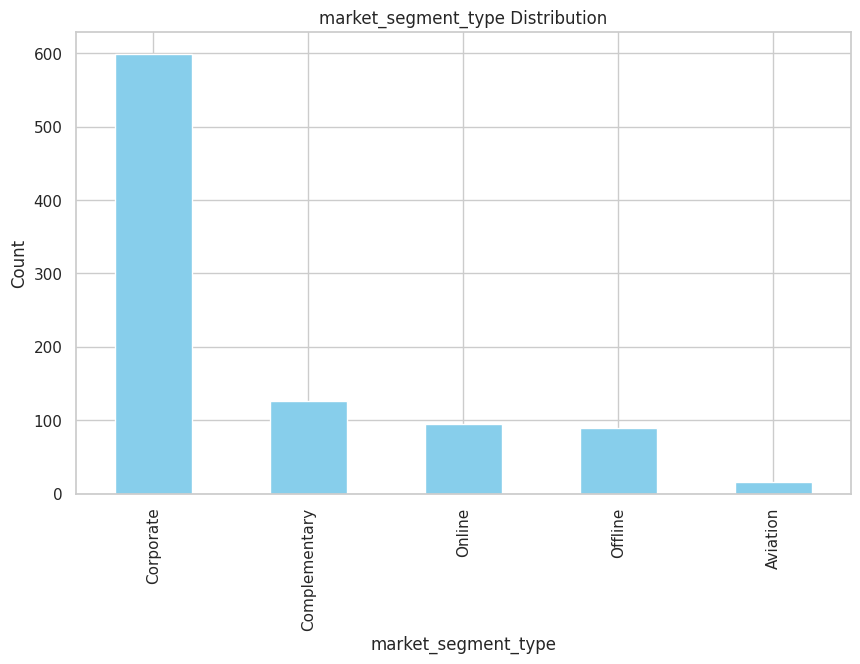

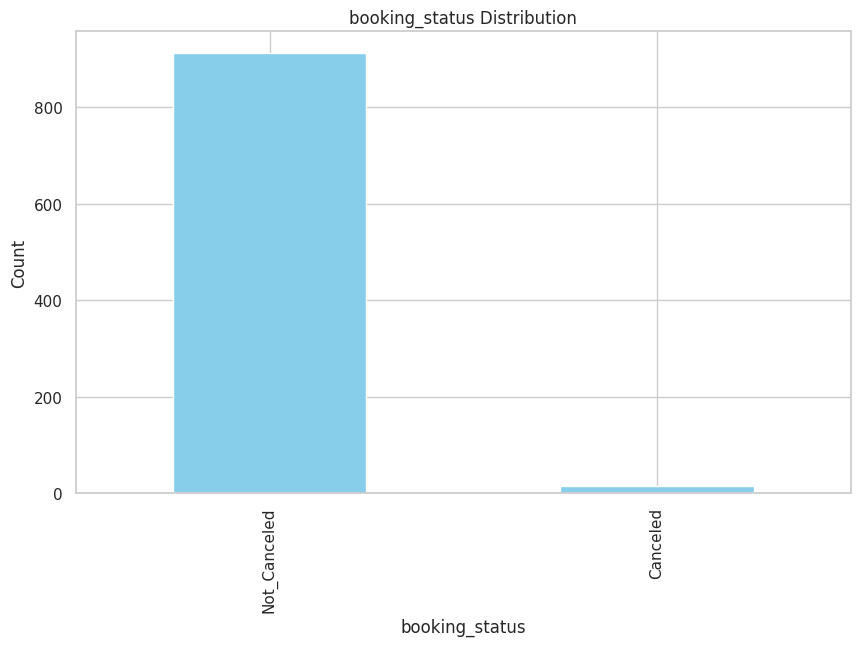

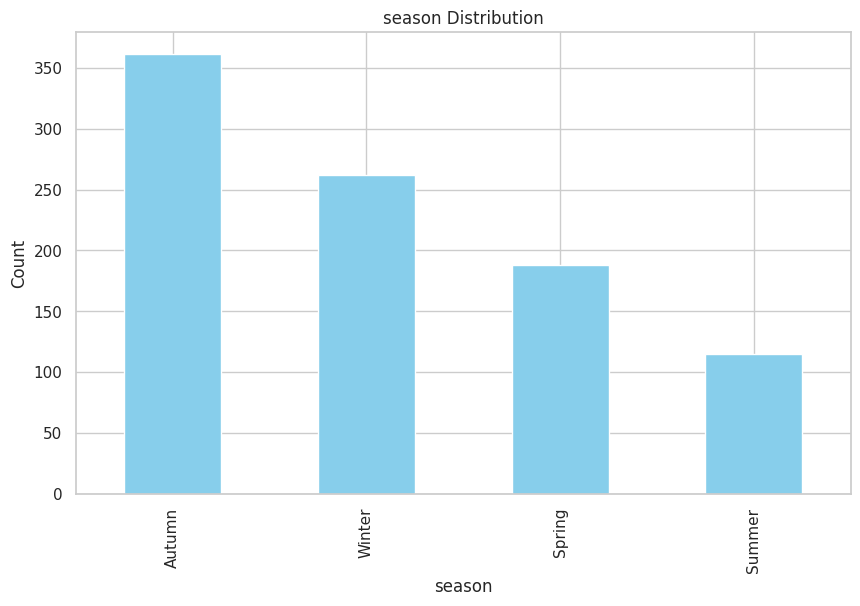

In [ ]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        df_repeated_guests[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()
